In [1]:
!git clone https://github.com/LeonardoFdSantos/Confiabilidade_de_Sistemas_Eletricos_de_Potencia_PPGEE_UFSM.git

Cloning into 'Confiabilidade_de_Sistemas_Eletricos_de_Potencia_PPGEE_UFSM'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 18 (delta 8), reused 8 (delta 3), pack-reused 0
Unpacking objects: 100% (18/18), done.


In [2]:
import math
import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show
import plotly.graph_objects as go
import plotly.express as px
from scipy.optimize import curve_fit
warnings.filterwarnings("ignore", category=RuntimeWarning) 
import seaborn as sns
sns.set_theme(style="darkgrid")

In [3]:
Geracao_Machadinho = pd.read_csv('./Confiabilidade_de_Sistemas_Eletricos_de_Potencia_PPGEE_UFSM/Simples_Geração_de_Energia_Dia_data_MACHADINHO.csv', sep=';')
Geracao_CMPC = pd.read_csv('./Confiabilidade_de_Sistemas_Eletricos_de_Potencia_PPGEE_UFSM/Simples_Geração_de_Energia_Dia_data_CMPC.csv', sep=';')
Geracao_CONJ_EOL_SANTA_VITORIA = pd.read_csv('./Confiabilidade_de_Sistemas_Eletricos_de_Potencia_PPGEE_UFSM/Simples_Geração_de_Energia_Dia_data_CONJ_EOL_SANTA_VITORIA.csv', sep=';')

In [4]:
Geracao_Machadinho = Geracao_Machadinho.drop(Geracao_Machadinho.index[0])
Geracao_CMPC = Geracao_CMPC.drop(Geracao_CMPC.index[0])
Geracao_CONJ_EOL_SANTA_VITORIA = Geracao_CONJ_EOL_SANTA_VITORIA.drop(Geracao_CONJ_EOL_SANTA_VITORIA.index[0])
Geracao_Machadinho = Geracao_Machadinho.drop(columns='Período_Exibido_GE')
Geracao_CMPC = Geracao_CMPC.drop(columns='Período_Exibido_GE')
Geracao_CONJ_EOL_SANTA_VITORIA = Geracao_CONJ_EOL_SANTA_VITORIA.drop(columns='Período_Exibido_GE')
Geracao_Machadinho = Geracao_Machadinho.rename(columns={"Selecione_Tipo_de_GE_Simp_4": "GWh"})
Geracao_CMPC = Geracao_CMPC.rename(columns={"Selecione_Tipo_de_GE_Simp_4": "GWh"})
Geracao_CONJ_EOL_SANTA_VITORIA = Geracao_CONJ_EOL_SANTA_VITORIA.rename(columns={"Selecione_Tipo_de_GE_Simp_4": "GWh"})

In [5]:
Geracao_Machadinho_limpos = Geracao_Machadinho.loc[(Geracao_Machadinho['GWh'] != 0)]
Geracao_CMPC_limpos = Geracao_CMPC.loc[(Geracao_CMPC['GWh'] != 0)]
Geracao_CONJ_EOL_SANTA_VITORIA_limpos = Geracao_CONJ_EOL_SANTA_VITORIA.loc[(Geracao_CONJ_EOL_SANTA_VITORIA['GWh'] != 0)]

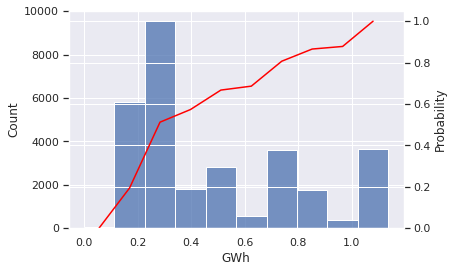

In [6]:
sns.histplot(data=Geracao_Machadinho_limpos, x="GWh", bins=10)
sns.histplot(data=Geracao_Machadinho_limpos, x="GWh", element="poly", fill=False, stat="probability", cumulative=True, bins=10, color='RED', ax=plt.twinx())

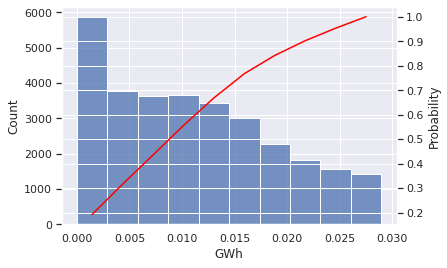

In [7]:
sns.histplot(data=Geracao_CMPC_limpos, x="GWh", bins=10)
sns.histplot(data=Geracao_CMPC_limpos, x="GWh", element="poly", fill=False, stat="probability", cumulative=True, bins=10, color='RED', ax=plt.twinx())

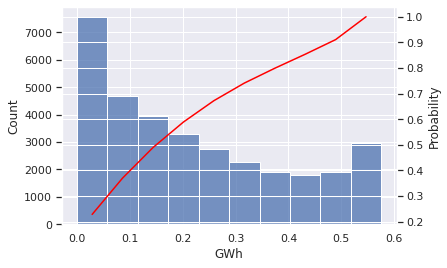

In [8]:
sns.histplot(data=Geracao_CONJ_EOL_SANTA_VITORIA_limpos, x="GWh", bins=10)
sns.histplot(data=Geracao_CONJ_EOL_SANTA_VITORIA_limpos, x="GWh", element="poly", fill=False, stat="probability", cumulative=True, bins=10, color='RED', ax=plt.twinx())